# Graficas PIA 


In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import folium
import squarify



ModuleNotFoundError: No module named 'squarify'

In [8]:
dataframe = pd.read_excel("Police_Department_2016.xlsx")
dataframe

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30:00,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01:00,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [9]:
dataframe['Category'] = dataframe['Category'].str.capitalize()
dataframe['Descript'] = dataframe['Descript'].str.capitalize()
dataframe['PdDistrict'] = dataframe['PdDistrict'].str.capitalize()
dataframe['Resolution'] = dataframe['Resolution'].str.capitalize()

In [10]:
dataframe.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,Weapon laws,Poss of prohibited weapon,Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,Weapon laws,"Firearm, loaded, in vehicle, possession or use",Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,Warrants,Warrant arrest,Monday,04/25/2016 12:00:00 AM,14:59:00,Bayview,"Arrest, booked",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,Non-criminal,Lost property,Tuesday,01/05/2016 12:00:00 AM,23:50:00,Tenderloin,None,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,Non-criminal,Lost property,Friday,01/01/2016 12:00:00 AM,00:30:00,Mission,None,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,Assault,Battery,Friday,01/01/2016 12:00:00 AM,21:35:00,Northern,None,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,Other offenses,Parole violation,Saturday,01/02/2016 12:00:00 AM,00:04:00,Southern,"Arrest, booked",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,Non-criminal,Fire report,Saturday,01/02/2016 12:00:00 AM,01:02:00,Tenderloin,None,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,Warrants,Warrant arrest,Saturday,01/02/2016 12:00:00 AM,12:21:00,Southern,"Arrest, booked",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,Missing person,Found person,Friday,01/01/2016 12:00:00 AM,10:06:00,Bayview,None,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [11]:
dataframe.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [12]:
dataframe.dropna(inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [13]:
dataframe

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,Weapon laws,Poss of prohibited weapon,Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,Weapon laws,"Firearm, loaded, in vehicle, possession or use",Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,Warrants,Warrant arrest,Monday,04/25/2016 12:00:00 AM,14:59:00,Bayview,"Arrest, booked",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,Non-criminal,Lost property,Tuesday,01/05/2016 12:00:00 AM,23:50:00,Tenderloin,None,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,Non-criminal,Lost property,Friday,01/01/2016 12:00:00 AM,00:30:00,Mission,None,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,161061000,Assault,Battery,Friday,12/30/2016 12:00:00 AM,21:01:00,Park,None,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150495,176000742,Non-criminal,Lost property,Friday,12/30/2016 12:00:00 AM,08:00:00,Central,None,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150496,176000758,Larceny/theft,Petty theft of property,Thursday,12/29/2016 12:00:00 AM,20:00:00,Central,None,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150497,176000764,Larceny/theft,Grand theft of property,Friday,12/30/2016 12:00:00 AM,10:00:00,Central,None,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [14]:
# Print the values in columns X, Y and Location to confirm that they are the same
print(dataframe['X'][0], dataframe['Y'][0])
print(dataframe['Location'][0])

-122.403404791479 37.775420706711
(37.775420706711, -122.403404791479)


In [15]:
#Remove columns X and Y
dataframe = dataframe.drop('X', 1)
dataframe = dataframe.drop('Y', 1)

In [16]:
dataframe.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Location,PdId
0,120058272,Weapon laws,Poss of prohibited weapon,Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,Weapon laws,"Firearm, loaded, in vehicle, possession or use",Friday,01/29/2016 12:00:00 AM,11:00:00,Southern,"Arrest, booked",800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,Warrants,Warrant arrest,Monday,04/25/2016 12:00:00 AM,14:59:00,Bayview,"Arrest, booked",KEITH ST / SHAFTER AV,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,Non-criminal,Lost property,Tuesday,01/05/2016 12:00:00 AM,23:50:00,Tenderloin,None,JONES ST / OFARRELL ST,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,Non-criminal,Lost property,Friday,01/01/2016 12:00:00 AM,00:30:00,Mission,None,16TH ST / MISSION ST,"(37.7650501214668, -122.419671780296)",16000274071000


In [17]:
#Number of occurrences of 10 categories of crime
categoriasMF =  dataframe['Category'].value_counts()[:10]
categoriasMF

Larceny/theft     40408
Other offenses    19599
Non-criminal      17866
Assault           13577
Vandalism          8589
Vehicle theft      6419
Warrants           5914
Burglary           5802
Suspicious occ     5782
Missing person     4338
Name: Category, dtype: int64

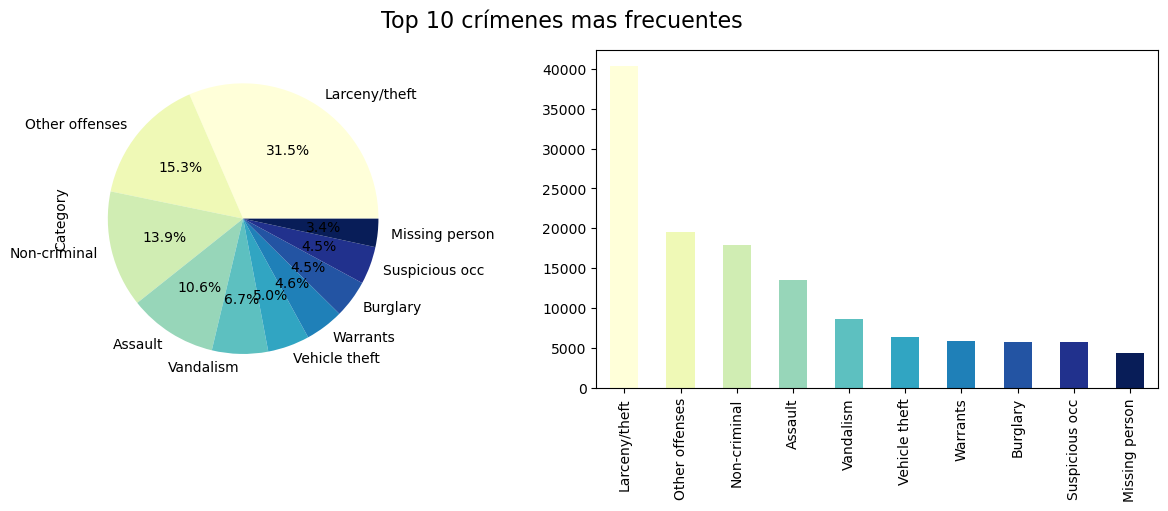

In [74]:
plt.style.use('default')
cmap = plt.cm.YlGnBu
colors = cmap(np.linspace(0., 1., 10))


fig, ax = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)
fig.suptitle('Top 10 crímenes mas frecuentes', fontsize=16)
categoriasMF.plot.pie(autopct="%.1f%%", colors = colors, ax = ax[0])
categoriasMF.plot.bar(color = colors, ax = ax[1])

In [27]:
days = dataframe['DayOfWeek'].value_counts()
days 

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20204
Name: DayOfWeek, dtype: int64

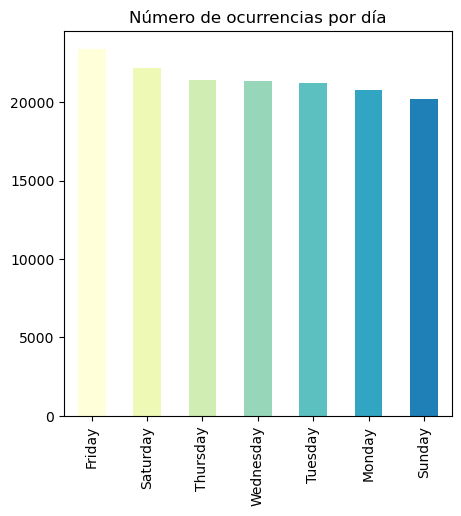

In [32]:
days.plot.bar(title = 'Número de ocurrencias por día', figsize=(5, 5), color = colors)

In [41]:
Distritos = dataframe['PdDistrict'].value_counts()
Distritos

Southern      28445
Northern      20100
Mission       19503
Central       17666
Bayview       14303
Ingleside     11594
Taraval       11325
Tenderloin     9942
Richmond       8922
Park           8699
Name: PdDistrict, dtype: int64

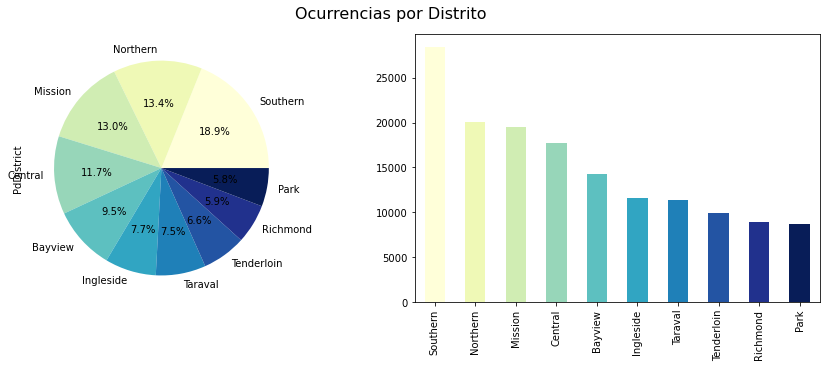

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True)
fig.suptitle('Ocurrencias por Distrito', fontsize=16)
Distritos.plot.pie(autopct ="%.1f%%", colors = colors, ax = ax[0])
Distritos.plot.bar(color = colors, ax = ax[1])

In [49]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [68]:
t = dataframe.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Crimenes'])
#table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Zona'}, axis='columns', inplace=True)

table

,Zona,Crimenes
0,Southern,28445
1,Northern,20100
2,Mission,19503
3,Central,17666
4,Bayview,14303
5,Ingleside,11594
6,Taraval,11325
7,Tenderloin,9942
8,Richmond,8922
9,Park,8699
